In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
proj = '44Ca'
trg = '159Tb'
cn = '203At'
bf = 0.68
ch = 'xn'
sigr = 3.2
bf_diff = 0.02

df10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.dat', sep='\t')
df0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.dat', sep='\t')

bf_low_10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf-bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
bf_high_10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf+bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

bf_low_0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf-bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
bf_high_0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf+bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
print(file_name10, file_name0)

44Ca_159Tb_203At_xn_IFUS10_barfac0.68_sigr3.2.dat 44Ca_159Tb_203At_xn_IFUS0_barfac0.68_sigr3.2.dat


## Experimental values with errors

In [125]:
# exp_data = pd.read_csv('data/exp_data.dat', sep=' ')
# dfm_exp = exp_data.melt(id_vars=['E'], var_name='isotope', value_name='CS')

e_lab = [184.7, 189.8, 196.3, 200.5, 208]
exp = [[np.nan, 18, 34, 48, 33], [130, 230, 120, 41, np.nan], [140, 90, 23, np.nan, np.nan]]
err_max = [[0, 8, 8, 11, 9], [20, 20, 10, 10, 0], [40, 25, 11, 0, 0]]
err_min = [[0, 6, 7, 9, 7], [20, 20, 10, 8, 0], [30, 21, 8, 0, 0]]

## Scaling of the values to mb, ub or nb

In [126]:
dfm10_mb = df10_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb = df0_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm10 = dfm10_mb
dfm0 = dfm0_mb
df10 = df10_mb
df0 = df0_mb
bf_low_10 = bf_low_10_mb
bf_high_10 = bf_high_10_mb
bf_low_0 = bf_low_0_mb
bf_high_0 = bf_high_0_mb

mb = 1
ub = 1e3
nb = 1e6

scale = ub
dfm10['CS'] = dfm10_mb['CS']*scale
dfm0['CS'] = dfm0_mb['CS']*scale
df10.iloc[:,2:] = df10_mb.iloc[:,2:] * scale
df0.iloc[:,2:] = df0_mb.iloc[:,2:] * scale
bf_low_10.iloc[:,2:] = bf_low_10_mb.iloc[:,2:] * scale
bf_high_10.iloc[:,2:] = bf_high_10_mb.iloc[:,2:] * scale
bf_low_0.iloc[:,2:] = bf_low_0_mb.iloc[:,2:] * scale
bf_high_0.iloc[:,2:] = bf_high_0_mb.iloc[:,2:] * scale
dfm10_mb.head()
bf_high_0

,E_lab,E*/MeV,197At,198At,199At,200At,201At,202At,203At
0,182.760,44.0,0.000000,0.000000e+00,0.000079,0.000057,1.270000e-07,0.0,0.0
1,184.037,45.0,0.000000,0.000000e+00,0.000293,0.000130,2.270000e-07,0.0,0.0
2,185.314,46.0,0.000000,0.000000e+00,0.061200,0.061200,6.600000e-04,0.0,0.0
3,186.591,47.0,0.000000,7.840000e-08,0.312000,0.234000,2.570000e-03,0.0,0.0
4,187.867,48.0,0.000000,5.300000e-06,1.160000,0.597000,5.560000e-03,0.0,0.0
5,189.144,49.0,0.000000,1.750000e-04,4.040000,1.410000,1.080000e-02,0.0,0.0
6,190.421,50.0,0.000000,3.450000e-03,13.300000,3.240000,2.050000e-02,0.0,0.0
7,191.697,51.0,0.000000,4.410000e-02,40.900000,7.150000,3.800000e-02,0.0,0.0
8,192.974,52.0,0.000000,3.740000e-01,112.000000,14.500000,6.660000e-02,0.0,0.0
9,194.251,53.0,0.000000,2.020000e+00,245.000000,24.900000,1.020000e-01,0.0,0.0


## Plotting

/tmp/ipykernel_125368/1266091873.py:8: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[plot_from:-plot_to]))], palette=colors)
/tmp/ipykernel_125368/1266091873.py:24: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[plot_from:-plot_to]))], linestyle='--', legend=None, palette=colors)
/home/adam/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


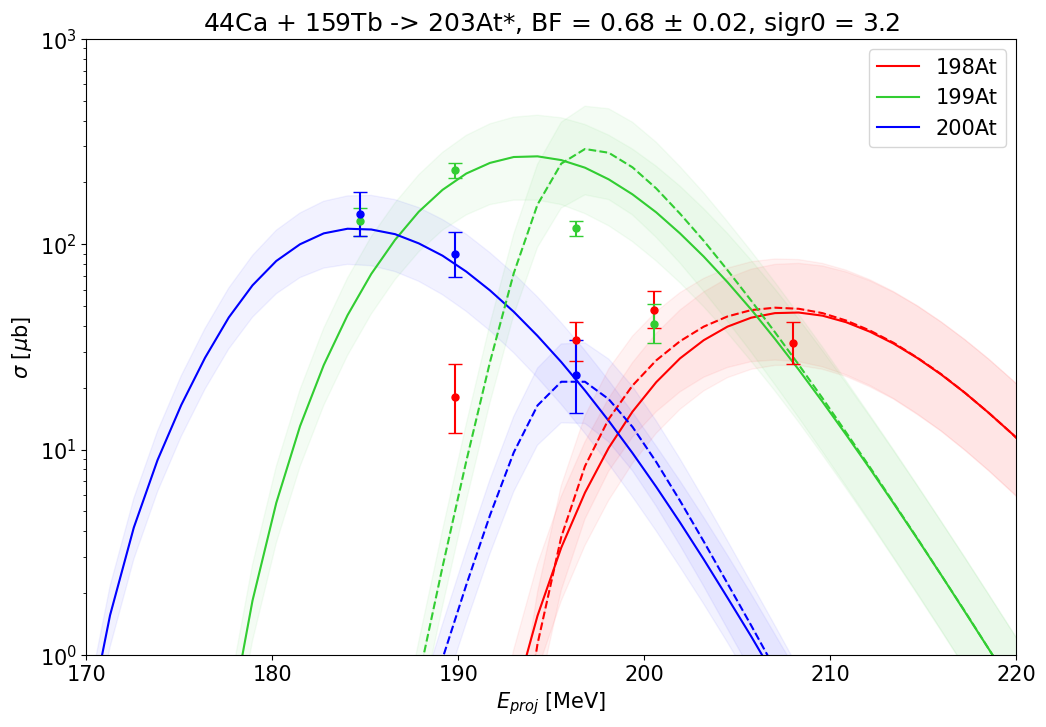

In [130]:
colors = ['red', 'limegreen', 'blue', 'gold', 'black', 'turquoise', 'magenta']
sns.color_palette("dark")

plot_from = 3
plot_to = 3

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[plot_from:-plot_to]))], palette=colors)
plt.semilogy()
plt.ylim(1e0, 1e3)
# plt.xlim(right=50)
# plt.xlim(20, 80)
plt.xlim(170, 220)
plt.title(proj + ' + ' + trg + ' -> ' + cn + '*, BF = ' + str(bf) + ' $\pm$ ' + str(bf_diff) + ', sigr0 = ' + str(sigr))
if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
plt.xlabel('$E_{proj}$ [MeV]')
plt.legend(loc='upper right')

sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[plot_from:-plot_to]))], linestyle='--', legend=None, palette=colors)


# sns.scatterplot(x='E', y='CS', hue='isotope', data=dfm_exp)
for i in range(len(exp)):
    (_, caps, _) = plt.errorbar(e_lab, exp[i], yerr=[err_min[i], err_max[i]], marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
    for cap in caps:
        cap.set_markeredgewidth(1)
        
for i in range(plot_from, len(df10.columns)-plot_to):
    plt.fill_between(df10.iloc[:, 0],  df10.iloc[:, i], bf_low_10.iloc[:, i], color=colors[i-plot_from], alpha=0.05)
    plt.fill_between(df10.iloc[:, 0],  df10.iloc[:, i], bf_high_10.iloc[:, i], color=colors[i-plot_from], alpha=0.05)
    plt.fill_between(df0.iloc[:, 0],  df0.iloc[:, i], bf_low_0.iloc[:, i], color=colors[i-plot_from], alpha=0.05)
    plt.fill_between(df0.iloc[:, 0],  df0.iloc[:, i], bf_high_0.iloc[:, i], color=colors[i-plot_from], alpha=0.05)

plt.rcParams.update({'font.size': 15})

plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_IFUS10' + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.png')
plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_IFUS10' + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.pdf')